# Lithium Blood-Brain-Barrier Penetration Classification

### Imports

In [1]:
from smdt import datasets, molecular_descriptors, classification, metrics

### Data

#### Data Loading

In [2]:
LiBloodBarrier = datasets.load_LiBloodBarrier()[:30]

Reference: 
Hu Li, Chun Wei Yap, Choong Yong Ung, Ying Xue, Zhi Wei Cao and Yu Zong Chen, J. Chem. Inf. Model. 2005


#### Descriptor Calculation

In [3]:
data = molecular_descriptors.getAllDescriptors(LiBloodBarrier)


Calculating Molecular Descriptors...
Row 30 out of 30
Calculating Molecular Descriptors Completed.


#### Data Cleaning

In [4]:
y = data['Target']
X = data.drop(['Target'], axis=1)

In [5]:
from sklearn.preprocessing import Imputer
a = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = a.fit_transform(X)

#### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Models

* **Number of Features** = 10

#### Gaussian Naive Bayes

In [8]:
model1, y_pred1, y_score1 = classification.fit_GaussianNB(X_train, X_test, y_train, y_test, 10)

Training data GridSearchCV accuracy: 0.80000
Testing Data Classification accuracy: 0.70103

Classification Report:
             precision    recall  f1-score   support

          n       0.55      0.50      0.52        32
          p       0.76      0.80      0.78        65

avg / total       0.69      0.70      0.70        97



#### K Nearest Neighbors

In [32]:
model2, y_pred2, y_score2 = classification.fit_KNearestNeighbors(X_train, X_test, y_train, y_test, 10)

Training data GridSearchCV accuracy: 0.81034
Testing Data Classification accuracy: 0.78351

Classification Report:
             precision    recall  f1-score   support

          n       0.70      0.59      0.64        32
          p       0.81      0.88      0.84        65

avg / total       0.78      0.78      0.78        97



#### Linear SVC

In [33]:
model3, y_pred3, y_score3 = classification.fit_LinearSVC(X_train, X_test, y_train, y_test, 10)

Training data GridSearchCV accuracy: 0.78621
Testing Data Classification accuracy: 0.76289

Classification Report:
             precision    recall  f1-score   support

          n       0.70      0.50      0.58        32
          p       0.78      0.89      0.83        65

avg / total       0.75      0.76      0.75        97



#### Random Forest Classifier

In [34]:
model4, y_pred4, y_score4 = classification.fit_RandomForestClassifier(X_train, X_test, y_train, y_test, 10)

Training data GridSearchCV accuracy: 0.80690
Testing Data Classification accuracy: 0.75258

Classification Report:
             precision    recall  f1-score   support

          n       0.62      0.62      0.62        32
          p       0.82      0.82      0.82        65

avg / total       0.75      0.75      0.75        97



#### SGD Classifier

In [35]:
model5, y_pred5, y_score5 = classification.fit_SGDClassifier(X_train, X_test, y_train, y_test, 10)

Training data GridSearchCV accuracy: 0.78276
Testing Data Classification accuracy: 0.71134

Classification Report:
             precision    recall  f1-score   support

          n       0.75      0.19      0.30        32
          p       0.71      0.97      0.82        65

avg / total       0.72      0.71      0.65        97



#### Metrics for all models trained on Top 10 features only

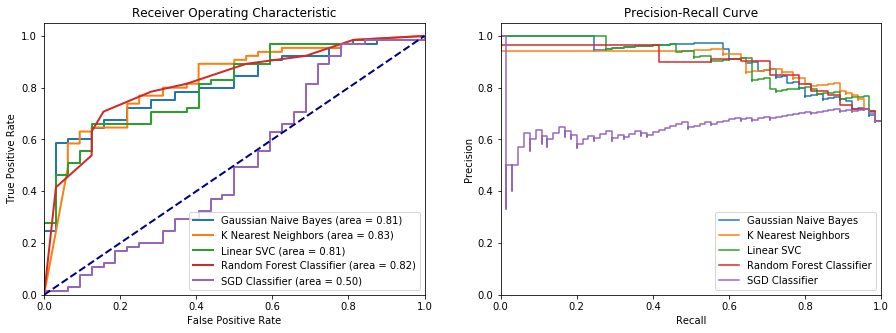

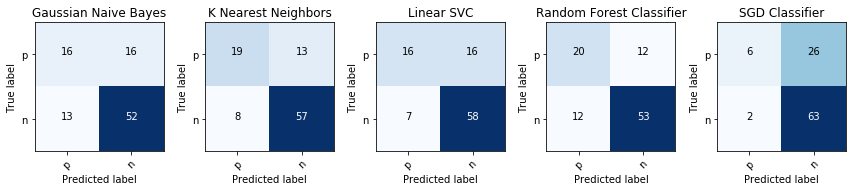

,Models,Accuracy,Area under ROC,Precision,Recall,F1 Score,Hamming Loss,Matthews Correlation,Jaccard Similarity,Zero One Loss
0,Gaussian Naive Bayes,0.701031,0.810577,0.764706,0.8,0.781955,0.298969,0.308106,0.701031,0.298969
1,K Nearest Neighbors,0.783505,0.825481,0.814286,0.876923,0.844444,0.216495,0.493765,0.783505,0.216495
2,Linear SVC,0.762887,0.80625,0.783784,0.892308,0.834532,0.237113,0.433689,0.762887,0.237113
3,Random Forest Classifier,0.752577,0.820913,0.815385,0.815385,0.815385,0.247423,0.440385,0.752577,0.247423
4,SGD Classifier,0.71134,0.501923,0.707865,0.969231,0.818182,0.28866,0.267883,0.71134,0.28866


In [36]:
models = ['Gaussian Naive Bayes', 'K Nearest Neighbors', 'Linear SVC', 'Random Forest Classifier', 'SGD Classifier']
y_pred = [y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]
y_score = [y_score1,y_score2,y_score3,y_score4,y_score5]
metrics.get_classifier_metrics(models, y_test, y_pred, y_score, 'p')

* **Number of Features** = 100

#### Gaussian Naive Bayes

In [37]:
model1, y_pred1, y_score1 = classification.fit_GaussianNB(X_train, X_test, y_train, y_test, 100)

Training data GridSearchCV accuracy: 0.77931
Testing Data Classification accuracy: 0.76289

Classification Report:
             precision    recall  f1-score   support

          n       0.65      0.62      0.63        32
          p       0.82      0.83      0.82        65

avg / total       0.76      0.76      0.76        97



#### K Nearest Neighbors

In [39]:
model2, y_pred2, y_score2 = classification.fit_KNearestNeighbors(X_train, X_test, y_train, y_test, 100)

Training data GridSearchCV accuracy: 0.82414
Testing Data Classification accuracy: 0.82474

Classification Report:
             precision    recall  f1-score   support

          n       0.83      0.59      0.69        32
          p       0.82      0.94      0.88        65

avg / total       0.82      0.82      0.82        97



#### Linear SVC

In [40]:
model3, y_pred3, y_score3 = classification.fit_LinearSVC(X_train, X_test, y_train, y_test, 100)

Training data GridSearchCV accuracy: 0.78276
Testing Data Classification accuracy: 0.77320

Classification Report:
             precision    recall  f1-score   support

          n       0.69      0.56      0.62        32
          p       0.80      0.88      0.84        65

avg / total       0.77      0.77      0.77        97



#### Random Forest

In [41]:
model4, y_pred4, y_score4 = classification.fit_RandomForestClassifier(X_train, X_test, y_train, y_test, 100)

Training data GridSearchCV accuracy: 0.82069
Testing Data Classification accuracy: 0.80412

Classification Report:
             precision    recall  f1-score   support

          n       0.71      0.69      0.70        32
          p       0.85      0.86      0.85        65

avg / total       0.80      0.80      0.80        97



#### SGD Classifier

In [42]:
model5, y_pred5, y_score5 = classification.fit_SGDClassifier(X_train, X_test, y_train, y_test, 100)

Training data GridSearchCV accuracy: 0.76552
Testing Data Classification accuracy: 0.68041

Classification Report:
             precision    recall  f1-score   support

          n       0.51      0.62      0.56        32
          p       0.79      0.71      0.75        65

avg / total       0.70      0.68      0.69        97



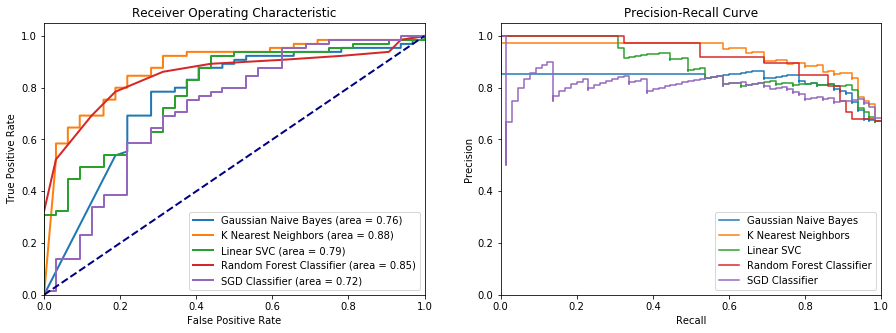

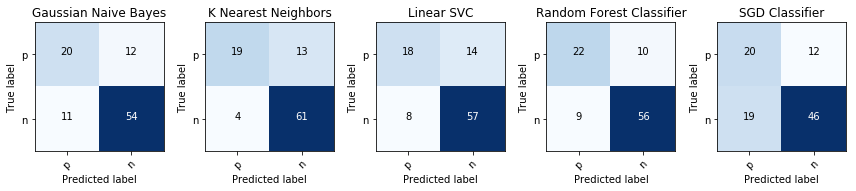

,Models,Accuracy,Area under ROC,Precision,Recall,F1 Score,Hamming Loss,Matthews Correlation,Jaccard Similarity,Zero One Loss
0,Gaussian Naive Bayes,0.762887,0.764663,0.818182,0.830769,0.824427,0.237113,0.459541,0.762887,0.237113
1,K Nearest Neighbors,0.824742,0.879327,0.824324,0.938462,0.877698,0.175258,0.588351,0.824742,0.175258
2,Linear SVC,0.773196,0.789423,0.802817,0.876923,0.838235,0.226804,0.466443,0.773196,0.226804
3,Random Forest Classifier,0.804124,0.849038,0.848485,0.861538,0.854962,0.195876,0.553582,0.804124,0.195876
4,SGD Classifier,0.680412,0.722115,0.793103,0.707692,0.747967,0.319588,0.319028,0.680412,0.319588


In [43]:
models = ['Gaussian Naive Bayes', 'K Nearest Neighbors', 'Linear SVC', 'Random Forest Classifier', 'SGD Classifier']
y_pred = [y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]
y_score = [y_score1,y_score2,y_score3,y_score4,y_score5]
metrics.get_classifier_metrics(models, y_test, y_pred, y_score, 'p')

In [7]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [30]:
# define baseline model
def baseline_model(input_dim=10,optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=input_dim, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [34]:
clf = KerasClassifier(build_fn=baseline_model,verbose=1)
feat_select = SelectKBest(k=10)
scaler = StandardScaler()

# create parameter grid, as usual, but note that you can
# vary other model parameters such as 'epochs' (and others 
# such as 'batch_size' too)
param_grid = {
    'clf__epochs':[10,50],
    'clf__batch_size': [10,20],
    'clf__optimizer': ['SGD','Adam']}

pipeline = Pipeline([
    ('preprocess',scaler),
    ('feat_sel',feat_select),
    ('clf',clf)
])

# if you're not using a GPU, you can set n_jobs to something other than 1
grid = GridSearchCV(pipeline, cv=10, param_grid=param_grid)
grid.fit(X_train, y_train)

Epoch 1/10
19/19 [==============================] - 5s 285ms/step - loss: 0.6143 - acc: 0.6842
Epoch 2/10
19/19 [==============================] - 0s 580us/step - loss: 0.6061 - acc: 0.6842
Epoch 3/10
19/19 [==============================] - 0s 528us/step - loss: 0.5986 - acc: 0.6842
Epoch 4/10
19/19 [==============================] - 0s 475us/step - loss: 0.5912 - acc: 0.6842
Epoch 5/10
19/19 [==============================] - 0s 607us/step - loss: 0.5840 - acc: 0.6842
Epoch 6/10
19/19 [==============================] - 0s 633us/step - loss: 0.5764 - acc: 0.6842
Epoch 7/10
19/19 [==============================] - 0s 528us/step - loss: 0.5715 - acc: 0.6842
Epoch 8/10
19/19 [==============================] - 0s 475us/step - loss: 0.5641 - acc: 0.6842
Epoch 9/10
19/19 [==============================] - 0s 739us/step - loss: 0.5572 - acc: 0.6842
Epoch 10/10
19/19 [==============================] - 0s 475us/step
Epoch 1/10
19/19 [==============================] - 5s 288ms/step - loss: 0.73

20/20 [==============================] - 0s 474us/step - loss: 0.5623 - acc: 0.6500
Epoch 10/10
20/20 [==============================] - 0s 451us/step
Epoch 1/10
20/20 [==============================] - 6s 293ms/step - loss: 0.8469 - acc: 0.4000
Epoch 2/10
20/20 [==============================] - 0s 451us/step - loss: 0.8343 - acc: 0.4000
Epoch 3/10
20/20 [==============================] - 0s 449us/step - loss: 0.8204 - acc: 0.4000
Epoch 4/10
20/20 [==============================] - 0s 426us/step - loss: 0.8081 - acc: 0.4500
Epoch 5/10
20/20 [==============================] - 0s 451us/step - loss: 0.7960 - acc: 0.4500
Epoch 6/10
20/20 [==============================] - 0s 425us/step - loss: 0.7842 - acc: 0.5000
Epoch 7/10
20/20 [==============================] - 0s 451us/step - loss: 0.7735 - acc: 0.5000
Epoch 8/10
20/20 [==============================] - 0s 451us/step - loss: 0.7630 - acc: 0.5000
Epoch 9/10
20/20 [==============================] - 0s 451us/step - loss: 0.7527 - acc: 0

20/20 [==============================] - 0s 474us/step - loss: 0.7056 - acc: 0.4500
Epoch 7/10
20/20 [==============================] - 0s 474us/step - loss: 0.6988 - acc: 0.4500
Epoch 8/10
20/20 [==============================] - 0s 451us/step - loss: 0.6920 - acc: 0.5000
Epoch 9/10
20/20 [==============================] - 0s 476us/step - loss: 0.6856 - acc: 0.5000
Epoch 10/10
20/20 [==============================] - 0s 351us/step
Epoch 1/10
20/20 [==============================] - 7s 336ms/step - loss: 0.7217 - acc: 0.8000
Epoch 2/10
20/20 [==============================] - 0s 501us/step - loss: 0.7147 - acc: 0.8000
Epoch 3/10
20/20 [==============================] - 0s 551us/step - loss: 0.7080 - acc: 0.8000
Epoch 4/10
20/20 [==============================] - 0s 552us/step - loss: 0.7028 - acc: 0.8000
Epoch 5/10
20/20 [==============================] - 0s 476us/step - loss: 0.6963 - acc: 0.8000
Epoch 6/10
20/20 [==============================] - 0s 526us/step - loss: 0.6901 - acc: 0

19/19 [==============================] - 0s 686us/step - loss: 0.5074 - acc: 0.8421
Epoch 37/50
19/19 [==============================] - 0s 633us/step - loss: 0.5024 - acc: 0.8421
Epoch 38/50
19/19 [==============================] - 0s 607us/step - loss: 0.4981 - acc: 0.8421
Epoch 39/50
19/19 [==============================] - 0s 554us/step - loss: 0.4940 - acc: 0.8421
Epoch 40/50
19/19 [==============================] - 0s 554us/step - loss: 0.4899 - acc: 0.8421
Epoch 41/50
19/19 [==============================] - 0s 475us/step - loss: 0.4864 - acc: 0.8947
Epoch 42/50
19/19 [==============================] - 0s 501us/step - loss: 0.4812 - acc: 0.8947
Epoch 43/50
19/19 [==============================] - 0s 528us/step - loss: 0.4771 - acc: 0.8947
Epoch 44/50
19/19 [==============================] - 0s 554us/step - loss: 0.4733 - acc: 0.8947
Epoch 45/50
19/19 [==============================] - 0s 554us/step - loss: 0.4691 - acc: 0.8947
Epoch 46/50
19/19 [==============================] -

20/20 [==============================] - 0s 476us/step - loss: 0.6520 - acc: 0.7500
Epoch 20/50
20/20 [==============================] - 0s 476us/step - loss: 0.6460 - acc: 0.7500
Epoch 21/50
20/20 [==============================] - 0s 451us/step - loss: 0.6402 - acc: 0.7500
Epoch 22/50
20/20 [==============================] - 0s 451us/step - loss: 0.6346 - acc: 0.7500
Epoch 23/50
20/20 [==============================] - 0s 451us/step - loss: 0.6295 - acc: 0.7500
Epoch 24/50
20/20 [==============================] - 0s 451us/step - loss: 0.6243 - acc: 0.7500
Epoch 25/50
20/20 [==============================] - 0s 451us/step - loss: 0.6192 - acc: 0.7500
Epoch 26/50
20/20 [==============================] - 0s 476us/step - loss: 0.6142 - acc: 0.7500
Epoch 27/50
20/20 [==============================] - 0s 426us/step - loss: 0.6100 - acc: 0.7500
Epoch 28/50
20/20 [==============================] - 0s 451us/step - loss: 0.6046 - acc: 0.7500
Epoch 29/50
20/20 [==============================] -

20/20 [==============================] - 0s 627us/step - loss: 0.9299 - acc: 0.1500
Epoch 3/50
20/20 [==============================] - 0s 602us/step - loss: 0.9120 - acc: 0.1500
Epoch 4/50
20/20 [==============================] - 0s 677us/step - loss: 0.8955 - acc: 0.1500
Epoch 5/50
20/20 [==============================] - 0s 652us/step - loss: 0.8795 - acc: 0.2000
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8643 - acc: 0.2000
Epoch 7/50
20/20 [==============================] - 0s 601us/step - loss: 0.8489 - acc: 0.2000
Epoch 8/50
20/20 [==============================] - 0s 652us/step - loss: 0.8347 - acc: 0.2000
Epoch 9/50
20/20 [==============================] - 0s 652us/step - loss: 0.8208 - acc: 0.3000
Epoch 10/50
20/20 [==============================] - 0s 727us/step - loss: 0.8075 - acc: 0.3500
Epoch 11/50
20/20 [==============================] - 0s 752us/step - loss: 0.7953 - acc: 0.4000
Epoch 12/50
20/20 [==============================] - 0s 602us

20/20 [==============================] - 0s 451us/step - loss: 0.4168 - acc: 0.9500
Epoch 37/50
20/20 [==============================] - 0s 551us/step - loss: 0.4121 - acc: 0.9500
Epoch 38/50
20/20 [==============================] - 0s 501us/step - loss: 0.4079 - acc: 0.9500
Epoch 39/50
20/20 [==============================] - 0s 576us/step - loss: 0.4039 - acc: 0.9500
Epoch 40/50
20/20 [==============================] - 0s 602us/step - loss: 0.4003 - acc: 0.9500
Epoch 41/50
20/20 [==============================] - 0s 526us/step - loss: 0.3958 - acc: 0.9500
Epoch 42/50
20/20 [==============================] - 0s 652us/step - loss: 0.3921 - acc: 0.9500
Epoch 43/50
20/20 [==============================] - 0s 551us/step - loss: 0.3883 - acc: 0.9500
Epoch 44/50
20/20 [==============================] - 0s 551us/step - loss: 0.3846 - acc: 0.9500
Epoch 45/50
20/20 [==============================] - 0s 551us/step - loss: 0.3811 - acc: 0.9500
Epoch 46/50
20/20 [==============================] -

20/20 [==============================] - 0s 602us/step - loss: 0.5861 - acc: 0.7000
Epoch 20/50
20/20 [==============================] - 0s 501us/step - loss: 0.5820 - acc: 0.7000
Epoch 21/50
20/20 [==============================] - 0s 501us/step - loss: 0.5775 - acc: 0.7000
Epoch 22/50
20/20 [==============================] - 0s 551us/step - loss: 0.5734 - acc: 0.7500
Epoch 23/50
20/20 [==============================] - 0s 602us/step - loss: 0.5694 - acc: 0.7500
Epoch 24/50
20/20 [==============================] - 0s 526us/step - loss: 0.5652 - acc: 0.7500
Epoch 25/50
20/20 [==============================] - 0s 526us/step - loss: 0.5613 - acc: 0.7500
Epoch 26/50
20/20 [==============================] - 0s 451us/step - loss: 0.5573 - acc: 0.7500
Epoch 27/50
20/20 [==============================] - 0s 577us/step - loss: 0.5538 - acc: 0.7500
Epoch 28/50
20/20 [==============================] - 0s 526us/step - loss: 0.5498 - acc: 0.7500
Epoch 29/50
20/20 [==============================] -

20/20 [==============================] - 0s 499us/step - loss: 0.6929 - acc: 0.7000
Epoch 3/50
20/20 [==============================] - 0s 501us/step - loss: 0.6837 - acc: 0.7000
Epoch 4/50
20/20 [==============================] - 0s 451us/step - loss: 0.6718 - acc: 0.7000
Epoch 5/50
20/20 [==============================] - 0s 476us/step - loss: 0.6628 - acc: 0.7000
Epoch 6/50
20/20 [==============================] - 0s 451us/step - loss: 0.6538 - acc: 0.7000
Epoch 7/50
20/20 [==============================] - 0s 476us/step - loss: 0.6438 - acc: 0.7000
Epoch 8/50
20/20 [==============================] - 0s 476us/step - loss: 0.6353 - acc: 0.7000
Epoch 9/50
20/20 [==============================] - 0s 451us/step - loss: 0.6277 - acc: 0.7000
Epoch 10/50
20/20 [==============================] - 0s 476us/step - loss: 0.6182 - acc: 0.7000
Epoch 11/50
20/20 [==============================] - 0s 476us/step - loss: 0.6108 - acc: 0.7000
Epoch 12/50
20/20 [==============================] - 0s 476

19/19 [==============================] - 0s 528us/step - loss: 0.6193 - acc: 0.7368
Epoch 37/50
19/19 [==============================] - 0s 528us/step - loss: 0.6122 - acc: 0.7368
Epoch 38/50
19/19 [==============================] - 0s 633us/step - loss: 0.6041 - acc: 0.7368
Epoch 39/50
19/19 [==============================] - 0s 501us/step - loss: 0.5973 - acc: 0.7368
Epoch 40/50
19/19 [==============================] - 0s 528us/step - loss: 0.5888 - acc: 0.7368
Epoch 41/50
19/19 [==============================] - 0s 554us/step - loss: 0.5821 - acc: 0.7368
Epoch 42/50
19/19 [==============================] - 0s 528us/step - loss: 0.5757 - acc: 0.7368
Epoch 43/50
19/19 [==============================] - 0s 554us/step - loss: 0.5675 - acc: 0.7368
Epoch 44/50
19/19 [==============================] - 0s 501us/step - loss: 0.5605 - acc: 0.7368
Epoch 45/50
19/19 [==============================] - 0s 528us/step - loss: 0.5543 - acc: 0.7895
Epoch 46/50
19/19 [==============================] -

20/20 [==============================] - 0s 476us/step - loss: 0.5074 - acc: 0.8000
Epoch 20/50
20/20 [==============================] - 0s 526us/step - loss: 0.5012 - acc: 0.8000
Epoch 21/50
20/20 [==============================] - 0s 602us/step - loss: 0.4950 - acc: 0.8000
Epoch 22/50
20/20 [==============================] - 0s 576us/step - loss: 0.4889 - acc: 0.8000
Epoch 23/50
20/20 [==============================] - 0s 551us/step - loss: 0.4830 - acc: 0.8000
Epoch 24/50
20/20 [==============================] - 0s 526us/step - loss: 0.4769 - acc: 0.8000
Epoch 25/50
20/20 [==============================] - 0s 551us/step - loss: 0.4714 - acc: 0.8000
Epoch 26/50
20/20 [==============================] - 0s 602us/step - loss: 0.4657 - acc: 0.8000
Epoch 27/50
20/20 [==============================] - 0s 602us/step - loss: 0.4603 - acc: 0.8000
Epoch 28/50
20/20 [==============================] - 0s 577us/step - loss: 0.4550 - acc: 0.8000
Epoch 29/50
20/20 [==============================] -

20/20 [==============================] - 0s 675us/step - loss: 0.7955 - acc: 0.5500
Epoch 3/50
20/20 [==============================] - 0s 601us/step - loss: 0.7857 - acc: 0.6000
Epoch 4/50
20/20 [==============================] - 0s 677us/step - loss: 0.7750 - acc: 0.6000
Epoch 5/50
20/20 [==============================] - 0s 601us/step - loss: 0.7633 - acc: 0.6000
Epoch 6/50
20/20 [==============================] - 0s 651us/step - loss: 0.7543 - acc: 0.6000
Epoch 7/50
20/20 [==============================] - 0s 677us/step - loss: 0.7425 - acc: 0.6500
Epoch 8/50
20/20 [==============================] - 0s 677us/step - loss: 0.7331 - acc: 0.6500
Epoch 9/50
20/20 [==============================] - 0s 652us/step - loss: 0.7232 - acc: 0.6500
Epoch 10/50
20/20 [==============================] - 0s 476us/step - loss: 0.7156 - acc: 0.6500
Epoch 11/50
20/20 [==============================] - 0s 476us/step - loss: 0.7049 - acc: 0.6500
Epoch 12/50
20/20 [==============================] - 0s 652

20/20 [==============================] - 0s 627us/step - loss: 0.4460 - acc: 0.9000
Epoch 37/50
20/20 [==============================] - 0s 551us/step - loss: 0.4417 - acc: 0.9000
Epoch 38/50
20/20 [==============================] - 0s 501us/step - loss: 0.4373 - acc: 0.9000
Epoch 39/50
20/20 [==============================] - 0s 501us/step - loss: 0.4335 - acc: 0.9000
Epoch 40/50
20/20 [==============================] - 0s 451us/step - loss: 0.4296 - acc: 0.9000
Epoch 41/50
20/20 [==============================] - 0s 451us/step - loss: 0.4255 - acc: 0.9000
Epoch 42/50
20/20 [==============================] - 0s 526us/step - loss: 0.4216 - acc: 0.9000
Epoch 43/50
20/20 [==============================] - 0s 501us/step - loss: 0.4179 - acc: 0.9000
Epoch 44/50
20/20 [==============================] - 0s 501us/step - loss: 0.4142 - acc: 0.9000
Epoch 45/50
20/20 [==============================] - 0s 501us/step - loss: 0.4103 - acc: 0.9000
Epoch 46/50
20/20 [==============================] -

20/20 [==============================] - 0s 476us/step - loss: 0.4621 - acc: 0.7500
Epoch 20/50
20/20 [==============================] - 0s 576us/step - loss: 0.4580 - acc: 0.7500
Epoch 21/50
20/20 [==============================] - 0s 451us/step - loss: 0.4538 - acc: 0.8000
Epoch 22/50
20/20 [==============================] - 0s 501us/step - loss: 0.4495 - acc: 0.8000
Epoch 23/50
20/20 [==============================] - 0s 476us/step - loss: 0.4455 - acc: 0.8000
Epoch 24/50
20/20 [==============================] - 0s 476us/step - loss: 0.4416 - acc: 0.8000
Epoch 25/50
20/20 [==============================] - 0s 476us/step - loss: 0.4374 - acc: 0.8000
Epoch 26/50
20/20 [==============================] - 0s 526us/step - loss: 0.4333 - acc: 0.8000
Epoch 27/50
20/20 [==============================] - 0s 451us/step - loss: 0.4296 - acc: 0.9000
Epoch 28/50
20/20 [==============================] - 0s 501us/step - loss: 0.4255 - acc: 0.9000
Epoch 29/50
20/20 [==============================] -

20/20 [==============================] - 0s 525us/step - loss: 0.8514 - acc: 0.4500
Epoch 3/50
20/20 [==============================] - 0s 501us/step - loss: 0.8418 - acc: 0.4500
Epoch 4/50
20/20 [==============================] - 0s 499us/step - loss: 0.8329 - acc: 0.4500
Epoch 5/50
20/20 [==============================] - 0s 476us/step - loss: 0.8234 - acc: 0.4500
Epoch 6/50
20/20 [==============================] - 0s 476us/step - loss: 0.8139 - acc: 0.4500
Epoch 7/50
20/20 [==============================] - 0s 526us/step - loss: 0.8053 - acc: 0.5000
Epoch 8/50
20/20 [==============================] - 0s 476us/step - loss: 0.7960 - acc: 0.5000
Epoch 9/50
20/20 [==============================] - 0s 500us/step - loss: 0.7872 - acc: 0.5000
Epoch 10/50
20/20 [==============================] - 0s 501us/step - loss: 0.7789 - acc: 0.5000
Epoch 11/50
20/20 [==============================] - 0s 702us/step - loss: 0.7694 - acc: 0.5000
Epoch 12/50
20/20 [==============================] - 0s 526

Epoch 4/10
20/20 [==============================] - 0s 226us/step - loss: 0.8952 - acc: 0.1000
Epoch 5/10
20/20 [==============================] - 0s 251us/step - loss: 0.8841 - acc: 0.1000
Epoch 6/10
20/20 [==============================] - 0s 226us/step - loss: 0.8732 - acc: 0.1000
Epoch 7/10
20/20 [==============================] - 0s 226us/step - loss: 0.8626 - acc: 0.1000
Epoch 8/10
20/20 [==============================] - 0s 226us/step - loss: 0.8523 - acc: 0.2000
Epoch 9/10
20/20 [==============================] - 0s 226us/step - loss: 0.8423 - acc: 0.2000
Epoch 10/10
20/20 [==============================] - 0s 175us/step
Epoch 1/10
20/20 [==============================] - 6s 299ms/step - loss: 0.8528 - acc: 0.3000
Epoch 2/10
20/20 [==============================] - 0s 201us/step - loss: 0.8449 - acc: 0.3500
Epoch 3/10
20/20 [==============================] - 0s 201us/step - loss: 0.8371 - acc: 0.4000
Epoch 4/10
20/20 [==============================] - 0s 251us/step - loss: 0.82

Epoch 2/10
19/19 [==============================] - 0s 317us/step - loss: 0.7788 - acc: 0.2105
Epoch 3/10
19/19 [==============================] - 0s 238us/step - loss: 0.7725 - acc: 0.2105
Epoch 4/10
19/19 [==============================] - 0s 237us/step - loss: 0.7662 - acc: 0.2105
Epoch 5/10
19/19 [==============================] - 0s 237us/step - loss: 0.7601 - acc: 0.2105
Epoch 6/10
19/19 [==============================] - 0s 343us/step - loss: 0.7540 - acc: 0.2105
Epoch 7/10
19/19 [==============================] - 0s 317us/step - loss: 0.7480 - acc: 0.2105
Epoch 8/10
19/19 [==============================] - 0s 343us/step - loss: 0.7421 - acc: 0.1579
Epoch 9/10
19/19 [==============================] - 0s 317us/step - loss: 0.7363 - acc: 0.2105
Epoch 10/10
19/19 [==============================] - 0s 211us/step
Epoch 1/10
20/20 [==============================] - 10s 484ms/step - loss: 0.7720 - acc: 0.2500
Epoch 2/10
20/20 [==============================] - 0s 226us/step - loss: 0.7

20/20 [==============================] - 0s 175us/step
Epoch 1/10
20/20 [==============================] - 12s 586ms/step - loss: 0.6225 - acc: 0.7500
Epoch 2/10
20/20 [==============================] - 0s 251us/step - loss: 0.6164 - acc: 0.7500
Epoch 3/10
20/20 [==============================] - 0s 276us/step - loss: 0.6104 - acc: 0.7500
Epoch 4/10
20/20 [==============================] - 0s 376us/step - loss: 0.6044 - acc: 0.7500
Epoch 5/10
20/20 [==============================] - 0s 526us/step - loss: 0.5986 - acc: 0.7500
Epoch 6/10
20/20 [==============================] - 0s 426us/step - loss: 0.5927 - acc: 0.7500
Epoch 7/10
20/20 [==============================] - 0s 376us/step - loss: 0.5870 - acc: 0.7500
Epoch 8/10
20/20 [==============================] - 0s 351us/step - loss: 0.5813 - acc: 0.7500
Epoch 9/10
20/20 [==============================] - 0s 326us/step - loss: 0.5756 - acc: 0.7500
Epoch 10/10
20/20 [==============================] - 0s 225us/step
Epoch 1/50
19/19 [====

Epoch 24/50
19/19 [==============================] - 0s 237us/step - loss: 0.6154 - acc: 0.8421
Epoch 25/50
19/19 [==============================] - 0s 343us/step - loss: 0.6120 - acc: 0.8421
Epoch 26/50
19/19 [==============================] - 0s 237us/step - loss: 0.6087 - acc: 0.8421
Epoch 27/50
19/19 [==============================] - 0s 237us/step - loss: 0.6054 - acc: 0.8421
Epoch 28/50
19/19 [==============================] - 0s 264us/step - loss: 0.6021 - acc: 0.8421
Epoch 29/50
19/19 [==============================] - 0s 369us/step - loss: 0.5989 - acc: 0.8421
Epoch 30/50
19/19 [==============================] - 0s 396us/step - loss: 0.5957 - acc: 0.8421
Epoch 31/50
19/19 [==============================] - 0s 290us/step - loss: 0.5925 - acc: 0.8421
Epoch 32/50
19/19 [==============================] - 0s 369us/step - loss: 0.5894 - acc: 0.8421
Epoch 33/50
19/19 [==============================] - 0s 422us/step - loss: 0.5863 - acc: 0.8421
Epoch 34/50
19/19 [=====================

Epoch 8/50
20/20 [==============================] - 0s 301us/step - loss: 0.5489 - acc: 0.9000
Epoch 9/50
20/20 [==============================] - 0s 325us/step - loss: 0.5453 - acc: 0.9000
Epoch 10/50
20/20 [==============================] - 0s 301us/step - loss: 0.5418 - acc: 0.9000
Epoch 11/50
20/20 [==============================] - 0s 226us/step - loss: 0.5383 - acc: 0.9000
Epoch 12/50
20/20 [==============================] - 0s 251us/step - loss: 0.5348 - acc: 0.9000
Epoch 13/50
20/20 [==============================] - 0s 226us/step - loss: 0.5314 - acc: 0.9000
Epoch 14/50
20/20 [==============================] - 0s 301us/step - loss: 0.5280 - acc: 0.9000
Epoch 15/50
20/20 [==============================] - 0s 251us/step - loss: 0.5247 - acc: 0.9000
Epoch 16/50
20/20 [==============================] - 0s 226us/step - loss: 0.5214 - acc: 0.9000
Epoch 17/50
20/20 [==============================] - 0s 226us/step - loss: 0.5181 - acc: 0.9000
Epoch 18/50
20/20 [=======================

Epoch 43/50
20/20 [==============================] - 0s 376us/step - loss: 0.7589 - acc: 0.8000
Epoch 44/50
20/20 [==============================] - 0s 326us/step - loss: 0.7549 - acc: 0.8000
Epoch 45/50
20/20 [==============================] - 0s 251us/step - loss: 0.7509 - acc: 0.8000
Epoch 46/50
20/20 [==============================] - 0s 301us/step - loss: 0.7470 - acc: 0.8000
Epoch 47/50
20/20 [==============================] - 0s 251us/step - loss: 0.7431 - acc: 0.8000
Epoch 48/50
20/20 [==============================] - 0s 226us/step - loss: 0.7392 - acc: 0.8000
Epoch 49/50
20/20 [==============================] - 0s 276us/step - loss: 0.7354 - acc: 0.8000
Epoch 50/50
20/20 [==============================] - 0s 176us/step
Epoch 1/50
20/20 [==============================] - 7s 349ms/step - loss: 0.9332 - acc: 0.1000
Epoch 2/50
20/20 [==============================] - 0s 226us/step - loss: 0.9260 - acc: 0.1000
Epoch 3/50
20/20 [==============================] - 0s 226us/step - los

Epoch 27/50
20/20 [==============================] - 0s 251us/step - loss: 0.5392 - acc: 0.8500
Epoch 28/50
20/20 [==============================] - 0s 251us/step - loss: 0.5368 - acc: 0.8500
Epoch 29/50
20/20 [==============================] - 0s 526us/step - loss: 0.5344 - acc: 0.8500
Epoch 30/50
20/20 [==============================] - 0s 301us/step - loss: 0.5321 - acc: 0.8500
Epoch 31/50
20/20 [==============================] - 0s 276us/step - loss: 0.5298 - acc: 0.8500
Epoch 32/50
20/20 [==============================] - 0s 301us/step - loss: 0.5274 - acc: 0.8500
Epoch 33/50
20/20 [==============================] - 0s 351us/step - loss: 0.5251 - acc: 0.8500
Epoch 34/50
20/20 [==============================] - 0s 301us/step - loss: 0.5228 - acc: 0.8500
Epoch 35/50
20/20 [==============================] - 0s 276us/step - loss: 0.5205 - acc: 0.8500
Epoch 36/50
20/20 [==============================] - 0s 301us/step - loss: 0.5182 - acc: 0.8500
Epoch 37/50
20/20 [=====================

Epoch 11/50
20/20 [==============================] - 0s 376us/step - loss: 0.6170 - acc: 0.8000
Epoch 12/50
20/20 [==============================] - 0s 225us/step - loss: 0.6136 - acc: 0.8000
Epoch 13/50
20/20 [==============================] - 0s 376us/step - loss: 0.6102 - acc: 0.8000
Epoch 14/50
20/20 [==============================] - 0s 326us/step - loss: 0.6067 - acc: 0.8000
Epoch 15/50
20/20 [==============================] - 0s 301us/step - loss: 0.6033 - acc: 0.8000
Epoch 16/50
20/20 [==============================] - 0s 226us/step - loss: 0.6000 - acc: 0.8000
Epoch 17/50
20/20 [==============================] - 0s 226us/step - loss: 0.5967 - acc: 0.8000
Epoch 18/50
20/20 [==============================] - 0s 226us/step - loss: 0.5934 - acc: 0.8000
Epoch 19/50
20/20 [==============================] - 0s 226us/step - loss: 0.5902 - acc: 0.8000
Epoch 20/50
20/20 [==============================] - 0s 226us/step - loss: 0.5871 - acc: 0.8000
Epoch 21/50
20/20 [=====================

Epoch 46/50
20/20 [==============================] - 0s 226us/step - loss: 0.5512 - acc: 0.8500
Epoch 47/50
20/20 [==============================] - 0s 251us/step - loss: 0.5488 - acc: 0.8500
Epoch 48/50
20/20 [==============================] - 0s 200us/step - loss: 0.5464 - acc: 0.8500
Epoch 49/50
20/20 [==============================] - 0s 276us/step - loss: 0.5441 - acc: 0.8500
Epoch 50/50
20/20 [==============================] - 0s 224us/step
Epoch 1/50
19/19 [==============================] - 7s 387ms/step - loss: 0.8082 - acc: 0.4737
Epoch 2/50
19/19 [==============================] - 0s 290us/step - loss: 0.8021 - acc: 0.5789
Epoch 3/50
19/19 [==============================] - 0s 290us/step - loss: 0.7961 - acc: 0.5789
Epoch 4/50
19/19 [==============================] - 0s 238us/step - loss: 0.7901 - acc: 0.6316
Epoch 5/50
19/19 [==============================] - 0s 475us/step - loss: 0.7841 - acc: 0.6316
Epoch 6/50
19/19 [==============================] - 0s 343us/step - loss: 

Epoch 30/50
19/19 [==============================] - 0s 237us/step - loss: 0.5524 - acc: 0.6842
Epoch 31/50
19/19 [==============================] - 0s 475us/step - loss: 0.5482 - acc: 0.6842
Epoch 32/50
19/19 [==============================] - 0s 317us/step - loss: 0.5441 - acc: 0.6842
Epoch 33/50
19/19 [==============================] - 0s 396us/step - loss: 0.5400 - acc: 0.6842
Epoch 34/50
19/19 [==============================] - 0s 317us/step - loss: 0.5359 - acc: 0.6842
Epoch 35/50
19/19 [==============================] - 0s 369us/step - loss: 0.5319 - acc: 0.7368
Epoch 36/50
19/19 [==============================] - 0s 290us/step - loss: 0.5280 - acc: 0.7368
Epoch 37/50
19/19 [==============================] - 0s 396us/step - loss: 0.5241 - acc: 0.7368
Epoch 38/50
19/19 [==============================] - 0s 290us/step - loss: 0.5203 - acc: 0.7368
Epoch 39/50
19/19 [==============================] - 0s 501us/step - loss: 0.5166 - acc: 0.7368
Epoch 40/50
19/19 [=====================

Epoch 14/50
20/20 [==============================] - 0s 301us/step - loss: 0.8768 - acc: 0.0500
Epoch 15/50
20/20 [==============================] - 0s 251us/step - loss: 0.8684 - acc: 0.0500
Epoch 16/50
20/20 [==============================] - 0s 276us/step - loss: 0.8601 - acc: 0.0500
Epoch 17/50
20/20 [==============================] - 0s 251us/step - loss: 0.8519 - acc: 0.0500
Epoch 18/50
20/20 [==============================] - 0s 276us/step - loss: 0.8438 - acc: 0.0500
Epoch 19/50
20/20 [==============================] - 0s 326us/step - loss: 0.8359 - acc: 0.0500
Epoch 20/50
20/20 [==============================] - 0s 276us/step - loss: 0.8281 - acc: 0.0500
Epoch 21/50
20/20 [==============================] - 0s 401us/step - loss: 0.8205 - acc: 0.1000
Epoch 22/50
20/20 [==============================] - 0s 226us/step - loss: 0.8129 - acc: 0.1000
Epoch 23/50
20/20 [==============================] - 0s 276us/step - loss: 0.8055 - acc: 0.1000
Epoch 24/50
20/20 [=====================

Epoch 49/50
20/20 [==============================] - 0s 276us/step - loss: 0.6488 - acc: 0.7000
Epoch 50/50
20/20 [==============================] - 0s 201us/step
Epoch 1/50
20/20 [==============================] - 8s 375ms/step - loss: 0.6712 - acc: 0.7000
Epoch 2/50
20/20 [==============================] - 0s 251us/step - loss: 0.6667 - acc: 0.7000
Epoch 3/50
20/20 [==============================] - 0s 276us/step - loss: 0.6606 - acc: 0.7000
Epoch 4/50
20/20 [==============================] - 0s 301us/step - loss: 0.6547 - acc: 0.7000
Epoch 5/50
20/20 [==============================] - 0s 376us/step - loss: 0.6488 - acc: 0.7000
Epoch 6/50
20/20 [==============================] - 0s 376us/step - loss: 0.6429 - acc: 0.7000
Epoch 7/50
20/20 [==============================] - 0s 301us/step - loss: 0.6371 - acc: 0.7000
Epoch 8/50
20/20 [==============================] - 0s 351us/step - loss: 0.6314 - acc: 0.7000
Epoch 9/50
20/20 [==============================] - 0s 401us/step - loss: 0.6

Epoch 33/50
20/20 [==============================] - 0s 251us/step - loss: 0.6642 - acc: 0.6500
Epoch 34/50
20/20 [==============================] - 0s 326us/step - loss: 0.6602 - acc: 0.6500
Epoch 35/50
20/20 [==============================] - 0s 301us/step - loss: 0.6563 - acc: 0.6500
Epoch 36/50
20/20 [==============================] - 0s 276us/step - loss: 0.6524 - acc: 0.6500
Epoch 37/50
20/20 [==============================] - 0s 301us/step - loss: 0.6485 - acc: 0.6500
Epoch 38/50
20/20 [==============================] - 0s 276us/step - loss: 0.6446 - acc: 0.7000
Epoch 39/50
20/20 [==============================] - 0s 301us/step - loss: 0.6408 - acc: 0.7000
Epoch 40/50
20/20 [==============================] - 0s 251us/step - loss: 0.6369 - acc: 0.7000
Epoch 41/50
20/20 [==============================] - 0s 276us/step - loss: 0.6331 - acc: 0.7000
Epoch 42/50
20/20 [==============================] - 0s 476us/step - loss: 0.6294 - acc: 0.7000
Epoch 43/50
20/20 [=====================

Epoch 17/50
20/20 [==============================] - 0s 251us/step - loss: 0.5693 - acc: 0.7500
Epoch 18/50
20/20 [==============================] - 0s 351us/step - loss: 0.5660 - acc: 0.7500
Epoch 19/50
20/20 [==============================] - 0s 251us/step - loss: 0.5627 - acc: 0.7500
Epoch 20/50
20/20 [==============================] - 0s 301us/step - loss: 0.5594 - acc: 0.7500
Epoch 21/50
20/20 [==============================] - 0s 376us/step - loss: 0.5561 - acc: 0.7500
Epoch 22/50
20/20 [==============================] - 0s 351us/step - loss: 0.5529 - acc: 0.7500
Epoch 23/50
20/20 [==============================] - 0s 276us/step - loss: 0.5497 - acc: 0.7500
Epoch 24/50
20/20 [==============================] - 0s 226us/step - loss: 0.5465 - acc: 0.7500
Epoch 25/50
20/20 [==============================] - 0s 251us/step - loss: 0.5434 - acc: 0.7500
Epoch 26/50
20/20 [==============================] - 0s 251us/step - loss: 0.5403 - acc: 0.8000
Epoch 27/50
20/20 [=====================

20/20 [==============================] - 0s 199us/step
Epoch 1/10
22/22 [==============================] - 7s 331ms/step - loss: 0.6873 - acc: 0.4545
Epoch 2/10
22/22 [==============================] - 0s 547us/step - loss: 0.6791 - acc: 0.4545
Epoch 3/10
22/22 [==============================] - 0s 798us/step - loss: 0.6716 - acc: 0.4545
Epoch 4/10
22/22 [==============================] - 0s 592us/step - loss: 0.6646 - acc: 0.4545
Epoch 5/10
22/22 [==============================] - 0s 798us/step - loss: 0.6576 - acc: 0.4545
Epoch 6/10
22/22 [==============================] - 0s 798us/step - loss: 0.6504 - acc: 0.4545
Epoch 7/10
22/22 [==============================] - 0s 706us/step - loss: 0.6435 - acc: 0.5000
Epoch 8/10
22/22 [==============================] - 0s 729us/step - loss: 0.6365 - acc: 0.5000
Epoch 9/10
22/22 [==============================] - 0s 615us/step - loss: 0.6296 - acc: 0.5000
Epoch 10/10
22/22 [==============================] - 0s 684us/step - loss: 0.6230 - acc: 0

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preprocess', StandardScaler(copy=True, with_mean=True, with_std=True)), ('feat_sel', SelectKBest(k=10, score_func=<function f_classif at 0x000002AA34EAA7B8>)), ('clf', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002AA9A1DDC50>)]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__epochs': [10, 50], 'clf__batch_size': [10, 20], 'clf__optimizer': ['SGD', 'Adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.636364 using {'clf__batch_size': 20, 'clf__epochs': 10, 'clf__optimizer': 'Adam'}
0.409091 (0.211579) with: {'clf__batch_size': 10, 'clf__epochs': 10, 'clf__optimizer': 'SGD'}
0.500000 (0.313823) with: {'clf__batch_size': 10, 'clf__epochs': 10, 'clf__optimizer': 'Adam'}
0.500000 (0.348155) with: {'clf__batch_size': 10, 'clf__epochs': 50, 'clf__optimizer': 'SGD'}
0.500000 (0.417424) with: {'clf__batch_size': 10, 'clf__epochs': 50, 'clf__optimizer': 'Adam'}
0.500000 (0.313823) with: {'clf__batch_size': 20, 'clf__epochs': 10, 'clf__optimizer': 'SGD'}
0.636364 (0.239087) with: {'clf__batch_size': 20, 'clf__epochs': 10, 'clf__optimizer': 'Adam'}
0.545455 (0.225752) with: {'clf__batch_size': 20, 'clf__epochs': 50, 'clf__optimizer': 'SGD'}
0.409091 (0.300367) with: {'clf__batch_size': 20, 'clf__epochs': 50, 'clf__optimizer': 'Adam'}
